<a href="https://colab.research.google.com/github/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp/notebooks/google-colab/better_nlp_summarisers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Better NLP

This is a wrapper program/library that encapsulates a couple of NLP libraries that are popular among the AI and ML communities.

Examples have been used to illustrate the usage as much as possible. Not all the APIs of the underlying libraries have been covered.

The idea is to keep the API language as high-level as possible, so its easier to use and stays human-readable.

Libraries / frameworks covered:

- nltk [site](http://www.nltk.org/) | [docs](https://buildmedia.readthedocs.org/media/pdf/nltk/latest/nltk.pdf)
- numpy [site](https://www.numpy.org/) | [docs](https://docs.scipy.org/doc/)
- networkx [site](https://networkx.github.io/) | [docs](https://networkx.github.io/documentation/stable/index.html)

See [https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp) for more details.

### This notebook will demonstrate the below NLP features / functionalities, using the above mentioned libraries

- Cosine similarity summarisation technique (extractive summarisation)
- Vertex ranking algorithm summarisation technique
- Build a simple text summarisation tool using NLTK
- Summarisation 4 (TODO)
- Summarisation 5 (TODO)

_Summarisation can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning._

### Resources

- [Understand Text Summarization and create your own summarizer in python](https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70)
- [An Introduction to Text Summarization using the TextRank Algorithm (with Python implementation)](https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/)
- [Beyond bag of words: Using PyTextRank to find Phrases and Summarize text](https://medium.com/@aneesha/beyond-bag-of-words-using-pytextrank-to-find-phrases-and-summarize-text-f736fa3773c5)
- [Build a simple text summarisation tool using NLTK](https://medium.com/@wilamelima/build-a-simple-text-summarisation-tool-using-nltk-ff0984fedb4f)
- [Summarise Text with TFIDF in Python](https://medium.com/@shivangisareen/summarise-text-with-tfidf-in-python-bc7ca10d3284)
- [How to Make a Text Summarizer - Intro to Deep Learning #10 by Siraj Raval](https://www.youtube.com/watch?v=ogrJaOIuBx4)

#### Setup and installation ( optional )

In case, this notebook is running in a local environment (Linux/MacOS) or _Google Colab_ environment and in case it does not have the necessary dependencies installed then please execute the steps in the next section.

Otherwise, please SKIP to the **Install Spacy model ( NOT optional )** section.

In [ ]:
%%time
%%bash

apt-get install apt-utils dselect dpkg

echo "OSTYPE=$OSTYPE"
if [[ "$OSTYPE" == "cygwin" ]] || [[ "$OSTYPE" == "msys" ]] ; then
    echo "Windows or Windows-like environment detected, script not tested, and may not work."
    echo "Try installing the components mention in the install-[ostype].sh scripts manually."
    echo "Or try running under CGYWIN or git-bash."
    echo "If successfully installed, please contribute back with the solution via a pull request, to https://github.com/neomatrix369/awesome-ai-ml-dl/"
    echo "Please give the file a good name, i.e. install-windows.sh or install-windows.bat depending on what kind of script you end up writing"
    exit 0
elif [[ "$OSTYPE" == "linux-gnu" ]] || [[ "$OSTYPE" == "linux" ]]; then
    TARGET_OS="linux"
else
    TARGET_OS="macos"
fi

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
  
  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     git clone "https://github.com/neomatrix369/awesome-ai-ml-dl"
  fi

  echo "Library source exists"
  cd awesome-ai-ml-dl/examples/better-nlp/build

  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true 
fi

Reading package lists...
Building dependency tree...
Reading state information...
dpkg is already the newest version (1.18.25).
dpkg set to manually installed.
The following NEW packages will be installed:
  apt-utils dselect libapt-inst2.0
0 upgraded, 3 newly installed, 0 to remove and 28 not upgraded.
Need to get 1888 kB of archives.
After this operation, 4168 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian stretch/main amd64 libapt-inst2.0 amd64 1.4.9 [192 kB]
Get:2 http://deb.debian.org/debian stretch/main amd64 apt-utils amd64 1.4.9 [410 kB]
Get:3 http://deb.debian.org/debian stretch/main amd64 dselect amd64 1.18.25 [1285 kB]
Fetched 1888 kB in 1s (1842 kB/s)
Selecting previously unselected package libapt-inst2.0:amd64.
(Reading database ... 36312 files and directories currently installed.)
Preparing to unpack .../libapt-inst2.0_1.4.9_amd64.deb ...
Unpacking libapt-inst2.0:amd64 (1.4.9) ...
Selecting previously unselected package apt-utils.
Preparing t

debconf: delaying package configuration, since apt-utils is not installed
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
You are using pip version 19

CPU times: user 10 ms, sys: 10 ms, total: 20 ms
Wall time: 1min 18s


#### Install Spacy model ( NOT optional )

Install the large English language model for spaCy - will be needed for the examples in this notebooks.

**Note:** from observation it appears that spaCy model should be installed towards the end of the installation process, it avoid errors when running programs using the model.

In [15]:
%%time
%%bash

python -m spacy download en_core_web_lg
python -m spacy link en_core_web_lg en || true

  Running setup.py install for en-core-web-lg: started
    Running setup.py install for en-core-web-lg: finished with status 'done'
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
✔ Linking successful
/usr/local/lib/python3.7/site-packages/en_core_web_lg -->
/usr/local/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


CPU times: user 10 ms, sys: 20 ms, total: 30 ms
Wall time: 5min 31s


## Examples of various summarisation methods

### Cosine similarity summarisation technique (extractive summarisation)

**Abstractive Summarization:** Abstractive methods select words based on semantic understanding, even those words did not appear in the source documents. It aims at producing important material in a new way. They interpret and examine the text using advanced natural language techniques in order to generate a new shorter text that conveys the most critical information from the original text.

**Flow:** Input document → understand context → semantics → create own summary

**Extractive Summarization:** Extractive methods attempt to summarize articles by selecting a subset of words that retain the most important points.

**Flow:** Input document → sentences similarity → weight sentences → select sentences with higher rank

**Cosine similarity** is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. Angle will be 0 if sentences are similar and tend towards 90 as they begin to differ.

Inspired by the author of https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

In [10]:
import sys
sys.path.insert(0, '../../library')
sys.path.insert(0, './awesome-ai-ml-dl/examples/better-nlp/library')

from org.neomatrix369.better_nlp import BetterNLP

In [11]:
betterNLP = BetterNLP() ### do not re-run this unless you wish to re-initialise the object
generic_text="""In an attempt to build an AI-ready workforce, SmartSoft Corp. announced Smart Colab Program which has been launched to empower the next generation of students with AI-ready skills. Envisioned as a three-year collaborative program, Smart Colab Program will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. As part of the program, the Palo Alto giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses. The company will provide AI development tools and Azure AI services such as SmartSoft Corp. Cognitive Services, Bot Services and Machine Learning Services. According to Mark Smith, Country AI Manager, SmartSoft Corp. India, said, "With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillset. This will require more collaborations and training and working with AI. That’s why it has become more critical than ever for educational institutions to integrate new cloud and AI technologies. The program is an attempt to ramp up the institutional set-up and build capabilities among the educators to educate the workforce of tomorrow." The program aims to build up the cognitive skills and in-depth understanding of developing intelligent cloud connected solutions for applications across industry. Earlier in April this year, the company announced SmartSoft Corp. Advanced Program In AI as a learning track open to the public. The program was developed to provide job ready skills to programmers who wanted to hone their skills in AI and data science with a series of online courses which featured hands-on labs and expert instructors as well. This program also included developer-focused AI school that provided a bunch of assets to help build AI skills."""

In [3]:
summarised_result = betterNLP.summarise(generic_text)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
print("summarised_text=",summarised_result['summarised_text'])
print("ranked_sentences=",summarised_result['ranked_sentences'])

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
summarisation_processing_time_in_secs= 0.07356882095336914
summarised_text= The company will provide AI development tools and Azure AI services such as SmartSoft Corp. Envisioned as a three-year collaborative program, Smart Colab Program will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. According to Mark Smith, Country AI Manager, SmartSoft Corp. Advanced Program In AI as a learning track open to the public. This will require more collaborations and training and working with AI
ranked_sentences= [(0.1344483475843947, ['The', 'company', 'will', 'provide', 'AI', 'development', 'tools', 'and', 'Azure', 'AI', 'services', 'such', 'as', 'SmartSoft', 'Corp']), (0.10424930788926609, ['Envisioned', 'as', 'a', 'three-year', 'collaborative', 'program,', 'Smart', 'C

### Vertex ranking algorithm summarisation technique

Using PyTextRank to find Phrases and Summarize text: Multi-word Phrase Extraction and Sentence Extraction for Summarization

Inspired by the author of https://medium.com/@aneesha/beyond-bag-of-words-using-pytextrank-to-find-phrases-and-summarize-text-f736fa3773c5 
(Notebook: https://github.com/DerwenAI/pytextrank/blob/master/example.ipynb)

Another resource to take a look at: https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/

In [4]:
%%time
%%bash

sed -i 's/graph.edge\[/graph.adj\[/g' /usr/local/lib/python3.7/site-packages/pytextrank/pytextrank.py || true
sed -i 's/, parse=True//g' /usr/local/lib/python3.7/site-packages/pytextrank/pytextrank.py || true

sed -i 's/graph.edge\[/graph.adj\[/g' ~/.local/lib/python3.7/site-packages/pytextrank/pytextrank.py || true
sed -i 's/, parse=True//g' ~/.local/lib/python3.7/site-packages/pytextrank/pytextrank.py || true

sed: can't read /usr/local/lib/python3.7/site-packages/pytextrank/pytextrank.py: No such file or directory
sed: can't read /usr/local/lib/python3.7/site-packages/pytextrank/pytextrank.py: No such file or directory


CPU times: user 0 ns, sys: 10 ms, total: 10 ms
Wall time: 90.6 ms


In [5]:
betterNLP = BetterNLP() ### do not re-run this unless you wish to re-initialise the object

In [6]:
source_file='source.json'
source_json_content='{"id":"777", "text":"In an attempt to build an AI-ready workforce, SmartSoft Corp. announced Smart Colab Program which has been launched to empower the next generation of students with AI-ready skills. Envisioned as a three-year collaborative program, Smart Colab Program will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services. As part of the program, the Palo Alto giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses. The company will provide AI development tools and Azure AI services such as SmartSoft Corp. Cognitive Services, Bot Services and Machine Learning Services. According to Mark Smith, Country AI Manager, SmartSoft Corp. India, said, ''With AI being the defining technology of our time, it is transforming lives and industry and the jobs of tomorrow will require a different skillset. This will require more collaborations and training and working with AI. That''s why it has become more critical than ever for educational institutions to integrate new cloud and AI technologies. The program is an attempt to ramp up the institutional set-up and build capabilities among the educators to educate the workforce of tomorrow.'' The program aims to build up the cognitive skills and in-depth understanding of developing intelligent cloud connected solutions for applications across industry. Earlier in April this year, the company announced SmartSoft Corp. Advanced Program In AI as a learning track open to the public. The program was developed to provide job ready skills to programmers who wanted to hone their skills in AI and data science with a series of online courses which featured hands-on labs and expert instructors as well. This program also included developer-focused AI school that provided a bunch of assets to help build AI skills."}'
with open(source_file, 'w') as f:
    f.write("%s" % source_json_content)

summarised_result = betterNLP.summarise(source_file, method="pytextrank")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
print("summarised_text=",summarised_result['summarised_text'])
print("token_ranks=",summarised_result['token_ranks'])
print("key_phrases=",summarised_result['key_phrases'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
summarisation_processing_time_in_secs= 22.113790273666382
summarised_text= In an attempt to build an AI-ready workforce, SmartSoft Corp. announced Smart Colab Program which has been launched to empower the next generation of students with AI-ready skills. The company will provide AI development tools and Azure AI services such as SmartSoft Corp. Cognitive Services, Bot Services and Machine Learning Services. SmartSoft Corp. Advanced Program This program also included developer-focused AI school that provided a bunch of assets to help build AI skills.
token_ranks= {'attempt': 0.004007163191756598, 'build': 0.02002982046641958, 'ai-ready': 0.0069375144751051485, 'workforce': 0.011319362868030584, 'SmartSoft': 0.006749117712102052, 'Corp.': 0.006869572233498017, 'announce': 0.0038951786096288886, 'Smart': 0.0050421179398664, 'Colab': 0.005993726664964676, 'Program': 0.0108750480147048

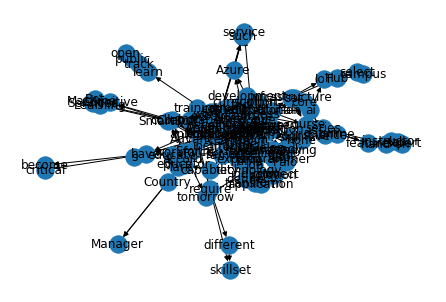

In [7]:
betterNLP.show_graph(summarised_result["graph"])

### Build a simple text summarisation tool using NLTK

Inspired by Wilame Lima Vallantin, the author of [Build a simple text summarisation tool using NLTK](https://medium.com/@wilamelima/build-a-simple-text-summarisation-tool-using-nltk-ff0984fedb4f).

We have to break the text into sentences and tokens, remove stop-words. Tokenise words, calculate word frequency to determine if a word is important on the corpus, using the TF-IDF technique.

In [13]:
summarised_result = betterNLP.summarise(generic_text, method="nltk_sklearn")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
print("summarised_text=",summarised_result['summarised_text'])
print("important_words=",summarised_result['important_words'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
summarisation_processing_time_in_secs= 0.22194361686706543
summarised_text= ['Envisioned as a three-year collaborative program, Smart Colab Program will support around 100 institutions with AI infrastructure, course content and curriculum, developer support, development tools and give students access to cloud and AI services.', 'As part of the program, the Palo Alto giant which wants to expand its reach and is planning to build a strong developer ecosystem in India with the program will set up the core AI infrastructure and IoT Hub for the selected campuses.']
important_words= [('ai', 0.5365674232184474), ('program', 0.412744171706498), ('build', 0.206372085853249), ('skill', 0.206372085853249), ('service', 0.206372085853249), ('smartsoft', 0.1650976686825992), ('corp.', 0.1650976686825992), ('cloud', 0.12382325151194941), ('attempt', 0.0825488343412996), ('ai-ready', 0.08254883434

### Summarisation 4

### Summarisation 5